In [1]:
import numpy as np
from scipy.interpolate import griddata

def random_terrain_generator(f, initialHeight, initialPerturb, minX, maxX, minY, maxY, numIter):
    dX = (maxX - minX) / 2
    dY = (maxY - minY) / 2
    x, y = np.meshgrid(np.arange(minX, maxX + dX, dX), np.arange(minY, maxY + dY, dY))
    terrain = np.ones(x.shape) * initialHeight
    perturb = initialPerturb

    for ii in range(2, numIter + 1):
        perturb = perturb / f
        oldX, oldY = x, y
        dX = (maxX - minX) / 2**ii
        dY = (maxY - minY) / 2**ii
        x, y = np.meshgrid(np.arange(minX, maxX + dX, dX), np.arange(minY, maxY + dY, dY))
        terrain = griddata((oldX.ravel(), oldY.ravel()), terrain.ravel(), (x, y), method='cubic')
        perturbation = perturb * np.random.normal(0, 1, size=x.shape)
        terrain += perturbation
        terrain[terrain < 0] = 0

    return x, y, terrain

# Example usage:
#f = 2
#initialHeight = 0
#initialPerturb = 10
#minX = 0
#maxX = 100
#minY = 0
#maxY = 100
#numIter = 5

#x, y, terrain = random_terrain_generator(f, initialHeight, initialPerturb, minX, maxX, minY, maxY, numIter)

In [2]:
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

def land_cmap(n):
    # Define color points
    color_points = np.array([[5/12, 1, 0.4], [0.25, 0.2, 1], [5/72, 1, 0.4]])

    # Create a LinearSegmentedColormap
    cmap = mcolors.LinearSegmentedColormap.from_list("land_colormap", color_points, N=n)

    return cmap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

def helper_plot_simulated_terrain(xvec, yvec, A):
    # Create a figure and 3D axis
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create a surface plot
    hS = ax.plot_surface(xvec, yvec, A, cmap=land_cmap(64), edgecolor='none')

    # Add a color bar
    hC = plt.colorbar(hS)
    hC.set_label('Elevation (m)')

    # Set the axis labels and title
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    ax.set_title('Simulated Terrain')

    # Set the view angle
    ax.view_init(azim=78, elev=78)

    # Display the plot
    plt.show()
    
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def helper_plot_ground_truth(xvec, yvec, A, rdrpos1, rdrpos2, targetpos):
    fig = plt.figure(figsize=(15, 7))
    plt.subplots_adjust(left=0.05, right=0.95, wspace=0.15)
    ax = fig.add_subplot(111, projection='3d')

    # Plot boundary (gray area)
    ax.plot_surface(np.array([[0, 1200], [0, 1200]]), np.array([[-200, -200], [200, 200]]), -100 * np.ones((2, 2)),
                    color='lightgray', alpha=0.7)

    # Plot terrain
    hS = ax.plot_surface(xvec, yvec, A, cmap=land_cmap(64), rstride=1, cstride=1, linewidth=0, antialiased=False)

    # Plot radar path
    ax.plot([rdrpos1[0], rdrpos2[0]], [rdrpos1[1], rdrpos2[1]], [rdrpos1[2], rdrpos2[2]], color='k', linewidth=2)

    # Plot radar start point
    ax.scatter(rdrpos1[0], rdrpos1[1], rdrpos1[2], c='g', marker='o', s=100, label='Radar Start')

    # Plot target points
    ax.scatter(targetpos[:, 0], targetpos[:, 1], targetpos[:, 2], c=[0.8500, 0.3250, 0.0980], marker='o', s=100,
               label='Target')

    # Set labels and title
    ax.set_xlabel('Range (m)')
    ax.set_ylabel('Cross-range (m)')
    ax.set_zlabel('Elevation (m)')
    ax.set_title('Ground Truth')

    # Set axis limits
    ax.set_xlim(0, 1200)
    ax.set_ylim(-200, 200)
    ax.set_zlim(-100, 1200)

    # Create legend
    ax.legend(loc='lower left')

    # Show the plot
    plt.show()
    
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap, BoundaryNorm

def helper_plot_reflectivity_map(xvec, yvec, A, reflectivity_type, rdrpos1, rdrpos2, targetpos):
    fig = plt.figure(figsize=(15, 7))
    plt.subplots_adjust(left=0.05, right=0.95, wspace=0.15)
    ax = fig.add_subplot(111, projection='3d')

    # Plot boundary (gray area)
    ax.plot_surface(np.array([[0, 1200], [0, 1200]]), np.array([[-200, -200], [200, 200]]), -100 * np.ones((2, 2)),
                    color='lightgray', alpha=0.7)

    # Plot terrain with reflectivity colormap
    cmap = ListedColormap(['green', 'brown'])
    bounds = [1, 2, 3]
    norm = BoundaryNorm(bounds, cmap.N)
    hS = ax.plot_surface(xvec, yvec, A, cmap=cmap, norm=norm, rstride=1, cstride=1, linewidth=0, antialiased=False)

    # Plot radar path
    ax.plot([rdrpos1[0], rdrpos2[0]], [rdrpos1[1], rdrpos2[1]], [rdrpos1[2], rdrpos2[2]], color='k', linewidth=2)

    # Plot radar start point
    ax.scatter(rdrpos1[0], rdrpos1[1], rdrpos1[2], c='g', marker='o', s=100, label='Radar Start')

    # Plot target points
    ax.scatter(targetpos[:, 0], targetpos[:, 1], targetpos[:, 2], c=[0.8500, 0.3250, 0.0980], marker='o', s=100,
               label='Target')

    # Set labels and title
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    ax.set_zlabel('Elevation (m)')
    ax.set_title('Reflectivity Map')

    # Set axis limits
    ax.set_xlim(0, 1200)
    ax.set_ylim(-200, 200)
    ax.set_zlim(-100, 1200)

    # Create a custom colorbar
    cmap = ListedColormap(['green', 'brown'])
    bounds = [1, 2, 3]
    norm = BoundaryNorm(bounds, cmap.N)
    cax = fig.add_axes([0.85, 0.1, 0.03, 0.8])
    cb = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), cax=cax)
    cb.set_ticks([1.5, 2.5])
    cb.set_ticklabels(['Woods', 'Hills'])

    # Create legend
    ax.legend(loc='lower left')

    # Show the plot
    plt.show()

def helper_plot_raw_iq(raw, min_sample):
    m, n = raw.shape
    range_samples = np.arange(min_sample, m + min_sample)
    cross_range_samples = np.arange(1, n + 1)
    
    fig, ax = plt.subplots()
    hRaw = ax.pcolormesh(range_samples, cross_range_samples, np.real(raw).T, cmap='viridis')
    ax.set_title('Raw Data')
    ax.set_xlabel('Range Samples')
    ax.set_ylabel('Cross-range Samples')
    
    cbar = plt.colorbar(hRaw)
    cbar.set_label('real(IQ)')
    
    plt.show()

def helper_update_plot_raw_iq(hRaw, raw):
    # Update the data of the existing plot
    hRaw.set_array(np.real(raw).T)
    hRaw.set_clim([-0.06, 0.06])
    
    plt.draw()
    plt.pause(0.25)
    
import numpy as np
import matplotlib.pyplot as plt

def helper_plot_slc(slcimg, min_sample, fs, v, prf, rdrpos1, targetpos, xvec, yvec, A):
    num_pulses = slcimg.shape[1]
    du = v * 1 / prf
    dky = 2 * np.pi / (num_pulses * du)
    dy = 2 * np.pi / (num_pulses * dky)
    y = dy * np.arange(num_pulses) + rdrpos1[1]

    c = 299792458  # Speed of light in m/s
    num_samples = slcimg.shape[0]
    samples = np.arange(min_sample, min_sample + num_samples)
    sample_time = samples * 1 / fs
    rng_vec = sample_time * c

    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(15, 7))

    # Ground Truth subplot
    ax[0].plot(targetpos[:, 0], targetpos[:, 1], 'o', markersize=8, markerfacecolor=[0.8500, 0.3250, 0.0980], markeredgecolor='k')
    ax[0].imshow(A, extent=(xvec.min(), xvec.max(), yvec.min(), yvec.max()), origin='lower', cmap=land_cmap)
    ax[0].set_xlabel('Range (m)')
    ax[0].set_ylabel('Cross-range (m)')
    ax[0].set_title('Ground Truth')
    ax[0].set_aspect('equal')
    ax[0].set_xlim(950, 1100)
    ax[0].set_ylim(0, 100)

    # SAR Image subplot
    slcimg_magnitude = np.abs(slcimg).T
    ax[1].imshow(slcimg_magnitude, extent=(rng_vec.min(), rng_vec.max(), y.min(), y.max()), origin='lower', cmap='viridis')
    ax[1].set_xlabel('Slant Range (m)')
    ax[1].set_ylabel('Cross-range (m)')
    ax[1].set_title('SAR Image')
    ax[1].set_aspect('equal')
    ax[1].set_xlim(1250, 1420)
    ax[1].set_ylim(y.min(), y.max())

    # Add colorbars
    cbar1 = plt.colorbar(ax[0].images[0], ax=ax[0], orientation='horizontal')
    cbar1.set_label('Elevation (m)')
    cbar2 = plt.colorbar(ax[1].images[0], ax=ax[1], orientation='horizontal')
    cbar2.set_label('Magnitude')

    # Show the plot
    plt.tight_layout()
    plt.show()

def helper_get_visibility_status(tgt_num, occ):
    visibility = ['not', 'partially', 'fully']
    if all(occ):
        idx = 0
    elif any(occ):
        idx = 1
    else:
        idx = 2
    vis_string = visibility[idx]
    pct_collect = (sum(1 - occ) / len(occ)) * 100
    print(f'Target {tgt_num} is {vis_string} visible during the scenario (visible {pct_collect:.0f}% of the data collection).')

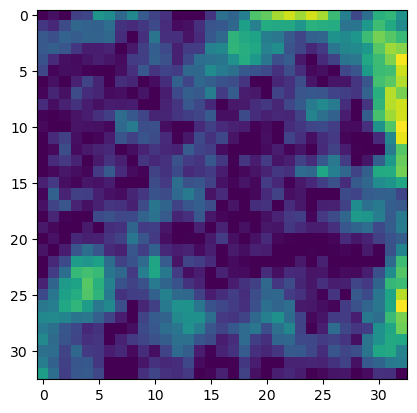

In [10]:
import matplotlib.pyplot as plt
plt.imshow(terrain)

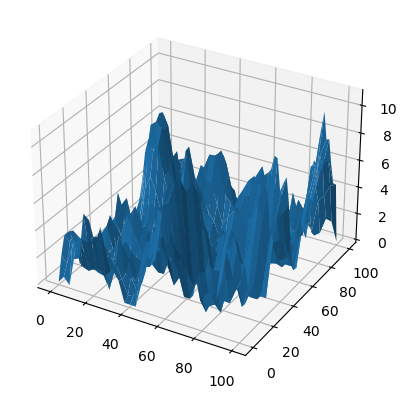

In [27]:
ax = plt.axes(projection='3d')
ax.plot_surface(x,y,terrain)


In [4]:
import numpy as np

# Initialize random number generator
np.random.seed(2021)

# Create terrain
xLimits = [900, 1200]  # x-axis limits of terrain (m)
yLimits = [-200, 200]  # y-axis limits of terrain (m)
roughness_factor = 1.75  # Roughness factor
initial_hgt = 0  # Initial height (m)
initial_perturb = 200  # Overall height of map (m)
numIter = 8  # Number of iterations

[x,y,terrain]=random_terrain_generator(roughness_factor,initial_hgt,initial_perturb,xLimits[0],xLimits[1],yLimits[0],yLimits[1],numIter);

# Fill-in areas below 0
terrain[terrain < 0] = 0

xvec = x[0, :]
yvec = y[:, 0]
res_map_x = np.mean(np.diff(xvec))

In [41]:
resMapY = np.mean(np.diff(yvec))

<IPython.core.display.Javascript object>


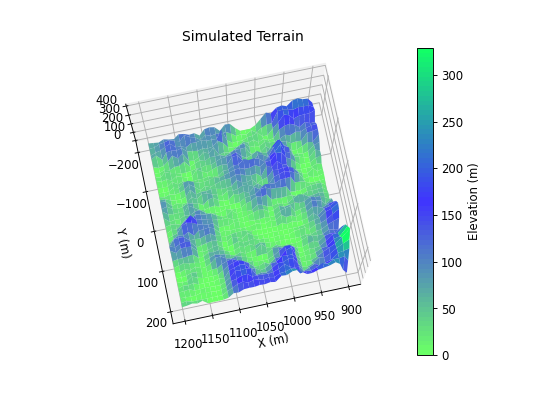

In [66]:
%matplotlib notebook
helper_plot_simulated_terrain(x, y, terrain)

In [8]:
# Define key radar parameters
freq = 1e9;                        # Carrier frequency (Hz)
c=3.0e8
Lambda = c/freq;                   # Wavelength (m) 
bw = 30e6;                         # Signal bandwidth (Hz)
fs = 60e6;                         # Sampling frequency (Hz)
tpd = 3e-6;                        # Pulse width (sec) 

# Antenna properties
apertureLength = 6;                # Aperture length (m) 
sqa = 0;                           # Squint angle (deg)

In [9]:
# Platform properties
v = 100  # Speed of the platform (m/s)
dur = 1  # Duration of flight (s)
rdrhgt = 1000  # Height of platform (m)
rdrpos1 = np.array([0, 0, rdrhgt])  # Start position of the radar (m)
rdrvel = np.array([0, v, 0])  # Radar platform velocity
rdrpos2 = rdrvel * dur + rdrpos1  # End position of the radar (m)
Len = v/dur              # Synthetic aperture length (m)

In [10]:
# Configure the target platforms in x and y
targetpos = np.array([[1000, Len / 2, 0],
                      [1020, Len / 2, 0],
                      [1040, Len / 2, 0]])  # Target positions (m)
tgthgts = 110 * np.ones(3)  # Target height (m)

for it in range(3):
    # Set target height relative to terrain
    idxX = np.argmin(np.abs(targetpos[it, 0] - xvec))
    idxY = np.argmin(np.abs(targetpos[it, 1] - yvec))
    tgthgts[it] = tgthgts[it] + terrain[idxY, idxX]
    targetpos[it, 2] = tgthgts[it]

In [11]:
# Set the reference slant range for the cross-range processing
rc = np.sqrt((rdrhgt - np.mean(tgthgts))**2 + (np.mean(targetpos[:, 0])**2))

# Antenna orientation
depang = np.arcsin(rdrhgt/rc)  # Depression angle (deg)
grazang = depang*180/np.pi  # Grazing angle (deg)

# Azimuth resolution
#azResolution = sarazres(rc, lambda_val, len)  # Cross-range resolution (m)
azResolution = 1.9572

In [12]:
# Select a PRF within the PRF bounds
prf = 500; # Pulse repetition frequency (Hz)

In [13]:
np.mean(tgthgts)

123.25204427157763

<IPython.core.display.Javascript object>


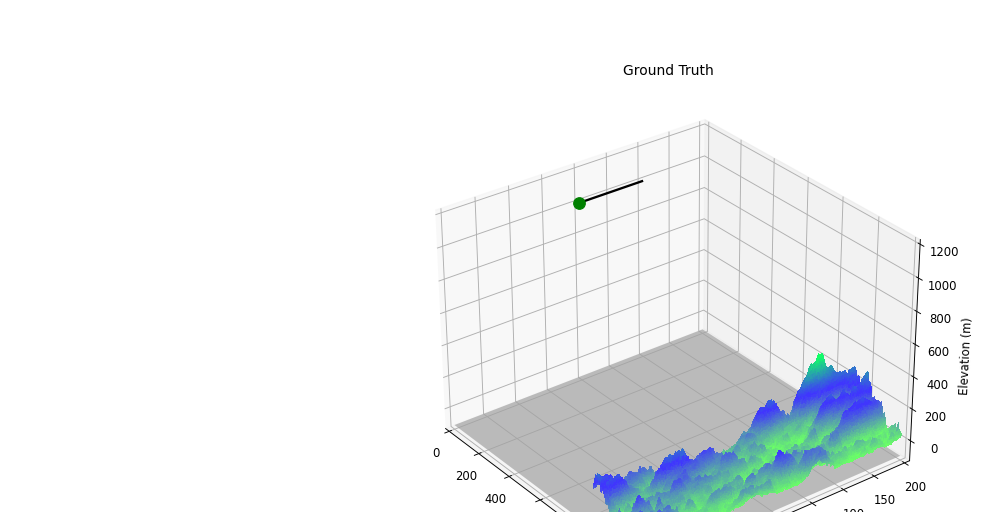

In [14]:
# Plot ground truth
%matplotlib notebook
helper_plot_ground_truth(x,y,terrain,rdrpos1,rdrpos2,targetpos)

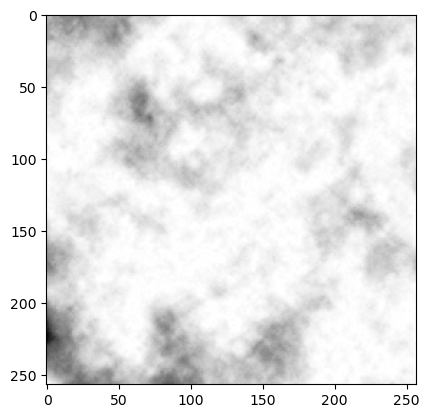

In [7]:
import matplotlib.pyplot as plt
plt.imshow(terrain,cmap="Greys")

In [ ]:
#https://www.mathworks.com/help/radar/ug/simulated-land-scenes-for-synthetic-aperture-radar-image-formation.html
#https://pythonnumericalmethods.berkeley.edu/notebooks/chapter12.02-3D-Plotting.html